In [1]:
#gpu stuff and testing
import os
os.environ["CUDA_DEVICE_ORDER"]= "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= "0"
##############################################
import tensorflow as tf
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
##############################################
tf.debugging.set_log_device_placement(True)

# Create some tensors
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)

2.2.0
Num GPUs Available:  1
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [2]:
import pandas as pd
import numpy as np

# Getting to business!

## Neural Network

### Topological fingerprints

In [3]:
X= pd.read_csv('../Data/topocolumns.csv')
file= pd.read_csv('../Data/tox21mice_duplicate.csv')
#X= pd.DataFrame(topofp)

In [4]:
#splitting into train and test data
from sklearn.model_selection import train_test_split
y=file[['SR-HSE', 'NR-AR','SR-ARE', 'NR-Aromatase', 'NR-ER-LBD', 'NR-AhR', 'SR-MMP', 'NR-ER','NR-PPAR-gamma', 'SR-p53', 'SR-ATAD5', 'NR-AR-LBD']]
X_topo_train, X_topo_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)

In [5]:
X_topo_train_reshape= X_topo_train.astype("float32")
X_topo_test_reshape= X_topo_test.astype("float32")

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
model = keras.Sequential(
    [
        layers.Embedding(8230,128,name="embedding_layer", input_length= 2048),
        layers.Dense(1300, activation="relu"),
        #layers.Dense(3, activation="relu"),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(12,activation='sigmoid', name="Output_layer"),
    ]
)

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 2048, 128)         1053440   
_________________________________________________________________
dense (Dense)                (None, 2048, 1300)        167700    
_________________________________________________________________
flatten (Flatten)            (None, 2662400)           0         
_________________________________________________________________
dropout (Dropout)            (None, 2662400)           0         
_________________________________________________________________
Output_layer (Dense)         (None, 12)                31948812  
Total params: 33,169,952
Trainable params: 33,169,952
Non-trainable params: 0
_________________________________________________________________


In [9]:
#compile and fit the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


In [10]:
model.fit(X_topo_train_reshape, y_train, epochs=10, batch_size=48, verbose=0.1)

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 1/10


In [11]:
#using model.predict to do thresholding
pred = model.predict(X_topo_train_reshape)
pred= tf.dtypes.cast(pred>= 0.5, tf.int64)

#for training data
count=0
for i in range(len(y_train)):
    a= (y_train.iloc[i]==pred[i])
    for j in range(len(a)):
        if (y_train.iloc[i][j]==pred[i][j]):
            count= count+1
print("The accuracy for the training set is: ",(count)/(len(y_train)*12))

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_predict_function_4527 in device /job:localhost/replica:0/task:0/dev

This step would take pretty long because of the size of the dataset

In [13]:
#for training data
count=0
for i in range(len(y_train)):
    a= (y_train.iloc[i]==pred[i])
    for j in range(len(a)):
        if (y_train.iloc[i][j]==pred[i][j]):
            count= count+1
print("The accuracy for the training set is: ",(count)/(len(y_train)*12))

The accuracy for the training set is:  0.9585662211421628


In [14]:
predtest= model.predict(X_topo_test_reshape)
predtest= tf.dtypes.cast(predtest>= 0.5, tf.int64)
count=0
for i in range(len(y_test)):
    a= (y_test.iloc[i]==predtest[i])
    for j in range(len(a)):
        if (y_test.iloc[i][j]==predtest[i][j]):
            count= count+1
print("The accuracy for test score is: ", count/(len(y_test)*12))

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ConcatV2 in device /job:localhost/replica:0/task:0/device:GPU:0
The accuracy for test score is:  0.9362008692365835


In [15]:
loss, acc= model.evaluate(X_topo_test_reshape, y_test, batch_size=128)
loss

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2483635 in device /job:localhost/replica:0/task:0/device:GPU:0
28/28 [==============================] - 2s 55ms/step - loss: 0.2156 - accurac

0.21564635634422302

### Random Forest

In [16]:
#importing libraries
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [17]:
#X_topo_train, X_topo_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 42)
classifier.fit(X_topo_train, y_train)
predict= classifier.predict(X_topo_test)
count_misclassified = (y_test != predict).sum()
print("The number of wrongly predicted data is:\n",count_misclassified)
rfaccuracy_topo= 1-(count_misclassified/len(y_test))
print("The accuracy of random forest is:\n", rfaccuracy_topo)

The number of wrongly predicted data is:
 SR-HSE           186
NR-AR            121
SR-ARE           510
NR-Aromatase     207
NR-ER-LBD        141
NR-AhR           323
SR-MMP           379
NR-ER            340
NR-PPAR-gamma     83
SR-p53           214
SR-ATAD5          97
NR-AR-LBD        114
dtype: int64
The accuracy of random forest is:
 SR-HSE           0.947279
NR-AR            0.965703
SR-ARE           0.855442
NR-Aromatase     0.941327
NR-ER-LBD        0.960034
NR-AhR           0.908447
SR-MMP           0.892574
NR-ER            0.903628
NR-PPAR-gamma    0.976474
SR-p53           0.939342
SR-ATAD5         0.972506
NR-AR-LBD        0.967687
dtype: float64


### Logistic Regression

#### SR-HSE

In [18]:
from sklearn.linear_model import LogisticRegression
sr_hse= y_train['SR-HSE']
lm = LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X_topo_train, sr_hse)
taccuracy1= lm.score(X_topo_test, y_test['SR-HSE'])
print("The accuracy of the model is:",taccuracy1)

The accuracy of the model is: 0.9430272108843537


#### NR-AR 

In [19]:
nr_ar= y_train['NR-AR']
lm.fit(X_topo_train, nr_ar)
taccuracy2= lm.score(X_topo_test, y_test['NR-AR'])
print("The accuracy of the model is:",taccuracy2)

The accuracy of the model is: 0.963718820861678


#### SR-ARE

In [20]:
sr_are= y_train['SR-ARE']
lm.fit(X_topo_train, sr_are)
taccuracy3= lm.score(X_topo_test, y_test['SR-ARE'])
print("The accuracy of the model is:",taccuracy3)

The accuracy of the model is: 0.8378684807256236


#### NR-Aromatase

In [21]:
nr_aromatase= y_train['NR-Aromatase']
lm.fit(X_topo_train, nr_aromatase)
taccuracy4= lm.score(X_topo_test, y_test['NR-Aromatase'])
print("The accuracy of the model is:",taccuracy4)

The accuracy of the model is: 0.9319727891156463


#### NR-ER-LBD

In [22]:
nr_erlbd= y_train['NR-ER-LBD']
lm.fit(X_topo_train, nr_erlbd)
taccuracy5= lm.score(X_topo_test, y_test['NR-ER-LBD'])
print("The accuracy of the model is:",taccuracy5)

The accuracy of the model is: 0.9520975056689343


#### NR-AhR

In [23]:
nr_ahr= y_train['NR-AhR']
lm.fit(X_topo_train, nr_ahr)
taccuracy6= lm.score(X_topo_test, y_test['NR-AhR'])
print("The accuracy of the model is:",taccuracy6)

The accuracy of the model is: 0.8996598639455783


#### SR-MMP

In [24]:
sr_mmp= y_train['SR-MMP']
lm.fit(X_topo_train, sr_mmp)
taccuracy7= lm.score(X_topo_test, y_test['SR-MMP'])
print("The accuracy of the model is:",taccuracy7)

The accuracy of the model is: 0.8818027210884354


#### NR-ER

In [25]:
nr_er= y_train['NR-ER']
lm.fit(X_topo_train, nr_er)
taccuracy8= lm.score(X_topo_test, y_test['NR-ER'])
print("The accuracy of the model is:",taccuracy8)

The accuracy of the model is: 0.8883219954648526


#### NR-PPAR-gamma

In [26]:
nr_ppar= y_train['NR-PPAR-gamma']
lm.fit(X_topo_train, nr_ppar)
taccuracy9= lm.score(X_topo_test, y_test['NR-PPAR-gamma'])
print("The accuracy of the model is:",taccuracy9)

The accuracy of the model is: 0.9759070294784581


#### SR-p53

In [27]:
sr_p53= y_train['SR-p53']
lm.fit(X_topo_train, sr_p53)
taccuracy10= lm.score(X_topo_test, y_test['SR-p53'])
print("The accuracy of the model is:",taccuracy10)

The accuracy of the model is: 0.9280045351473923


#### SR-ATAD5

In [28]:
sr_atad5= y_train['SR-ATAD5']
lm.fit(X_topo_train, sr_atad5)
taccuracy11= lm.score(X_topo_test, y_test['SR-ATAD5'])
print("The accuracy of the model is:",taccuracy11)

The accuracy of the model is: 0.9708049886621315


#### NR-AR-LBD

In [29]:
nr_arlbd= y_train['NR-AR-LBD']
lm.fit(X_topo_train, nr_arlbd)
taccuracy12= lm.score(X_topo_test, y_test['NR-AR-LBD'])
print("The accuracy of the model is:",taccuracy12)

The accuracy of the model is: 0.9679705215419501


### SVM

In [30]:
from sklearn import svm

#### SR-HSE

In [31]:
sr_hse= y_train['SR-HSE']
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovr')
sig.fit(X_topo_train, sr_hse)
tsaccuracy1= sig.score(X_topo_test, y_test['SR-HSE'])
print("The accuracy of the model is:",tsaccuracy1)

The accuracy of the model is: 0.941609977324263


#### NR-AR 

In [32]:
nr_ar= y_train['NR-AR']
sig.fit(X_topo_train, nr_ar)
tsaccuracy2= sig.score(X_topo_test, y_test['NR-AR'])
print("The accuracy of the model is:",tsaccuracy2)

The accuracy of the model is: 0.9654195011337868


#### SR-ARE

In [33]:
sr_are= y_train['SR-ARE']
sig.fit(X_topo_train, sr_are)
tsaccuracy3= sig.score(X_topo_test, y_test['SR-ARE'])
print("The accuracy of the model is:",tsaccuracy3)

The accuracy of the model is: 0.7967687074829932


#### NR-Aromatase

In [34]:
nr_aromatase= y_train['NR-Aromatase']
sig.fit(X_topo_train, nr_aromatase)
tsaccuracy4= sig.score(X_topo_test, y_test['NR-Aromatase'])
print("The accuracy of the model is:",tsaccuracy4)

The accuracy of the model is: 0.9322562358276644


#### NR-ER-LBD

In [35]:
nr_erlbd= y_train['NR-ER-LBD']
sig.fit(X_topo_train, nr_erlbd)
tsaccuracy5= sig.score(X_topo_test, y_test['NR-ER-LBD'])
print("The accuracy of the model is:",tsaccuracy5)

The accuracy of the model is: 0.9509637188208617


#### NR-AhR

In [36]:
nr_ahr= y_train['NR-AhR']
sig.fit(X_topo_train, nr_ahr)
tsaccuracy6= sig.score(X_topo_test, y_test['NR-AhR'])
print("The accuracy of the model is:",tsaccuracy6)

The accuracy of the model is: 0.8897392290249433


#### SR-MMP

In [37]:
sr_mmp= y_train['SR-MMP']
sig.fit(X_topo_train, sr_mmp)
tsaccuracy7= sig.score(X_topo_test, y_test['SR-MMP'])
print("The accuracy of the model is:",tsaccuracy7)

The accuracy of the model is: 0.8458049886621315


#### NR-ER

In [38]:
nr_er= y_train['NR-ER']
sig.fit(X_topo_train, nr_er)
tsaccuracy8= sig.score(X_topo_test, y_test['NR-ER'])
print("The accuracy of the model is:",tsaccuracy8)

The accuracy of the model is: 0.8962585034013606


#### NR-PPAR-gamma

In [39]:
nr_ppar= y_train['NR-PPAR-gamma']
sig.fit(X_topo_train, nr_ppar)
tsaccuracy9= sig.score(X_topo_test, y_test['NR-PPAR-gamma'])
print("The accuracy of the model is:",tsaccuracy9)

The accuracy of the model is: 0.9764739229024944


#### SR-p53

In [40]:
sr_p53= y_train['SR-p53']
sig.fit(X_topo_train, sr_p53)
tsaccuracy10= sig.score(X_topo_test, y_test['SR-p53'])
print("The accuracy of the model is:",tsaccuracy10)

The accuracy of the model is: 0.9265873015873016


#### SR-ATAD5

In [41]:
sr_atad5= y_train['SR-ATAD5']
sig.fit(X_topo_train, sr_atad5)
tsaccuracy11= sig.score(X_topo_test, y_test['SR-ATAD5'])
print("The accuracy of the model is:",tsaccuracy11)

The accuracy of the model is: 0.9674036281179138


#### NR-AR-LBD

In [42]:
nr_arlbd= y_train['NR-AR-LBD']
sig.fit(X_topo_train, nr_arlbd)
tsaccuracy12= sig.score(X_topo_test, y_test['NR-AR-LBD'])
print("The accuracy of the model is:",tsaccuracy12)

The accuracy of the model is: 0.9648526077097506


#### Summary of topo data

In [43]:
print("\033[1m" + "For Random Forest:"+ "\033[0m")
print(rfaccuracy_topo)
print("\033[0m"+"----------")
print("\033[1m" + "For SVM:"+ "\033[0m")
print("\033[1m" + "For Logistic Regression:" + "\033[0m")
print("SR-HSE: \t", taccuracy1)
print("NR-AR: \t", taccuracy2)
print("SR-ARE: \t", taccuracy3)
print("NR-Aromatase: \t", taccuracy4)
print("NR-ER-LBD: \t", taccuracy5)
print("NR-AhR: \t", taccuracy6)
print("SR-MMP: \t", taccuracy7)
print("NR-ER: \t", taccuracy8)
print("NR-PPAR-gamma: \t", taccuracy9)
print("SR-p53: \t", taccuracy10)
print("SR-ATAD5: \t", taccuracy11)
print("NR-AR-LBD: \t", taccuracy12)
print("\033[0m"+"----------")
print("\033[1m" + "For SVM:"+ "\033[0m")
print("SR-HSE: \t", tsaccuracy1)
print("NR-AR: \t", tsaccuracy2)
print("SR-ARE: \t", tsaccuracy3)
print("NR-Aromatase: \t", tsaccuracy4)
print("NR-ER-LBD: \t", tsaccuracy5)
print("NR-AhR: \t", tsaccuracy6)
print("SR-MMP: \t", tsaccuracy7)
print("NR-ER: \t", tsaccuracy8)
print("NR-PPAR-gamma: \t", tsaccuracy9)
print("SR-p53: \t", tsaccuracy10)
print("SR-ATAD5: \t", tsaccuracy11)
print("NR-AR-LBD: \t", tsaccuracy12)

For Random Forest:
SR-HSE           0.947279
NR-AR            0.965703
SR-ARE           0.855442
NR-Aromatase     0.941327
NR-ER-LBD        0.960034
NR-AhR           0.908447
SR-MMP           0.892574
NR-ER            0.903628
NR-PPAR-gamma    0.976474
SR-p53           0.939342
SR-ATAD5         0.972506
NR-AR-LBD        0.967687
dtype: float64
----------
For SVM:
For Logistic Regression:
SR-HSE: 	 0.9430272108843537
NR-AR: 	 0.963718820861678
SR-ARE: 	 0.8378684807256236
NR-Aromatase: 	 0.9319727891156463
NR-ER-LBD: 	 0.9520975056689343
NR-AhR: 	 0.8996598639455783
SR-MMP: 	 0.8818027210884354
NR-ER: 	 0.8883219954648526
NR-PPAR-gamma: 	 0.9759070294784581
SR-p53: 	 0.9280045351473923
SR-ATAD5: 	 0.9708049886621315
NR-AR-LBD: 	 0.9679705215419501
----------
For SVM:
SR-HSE: 	 0.941609977324263
NR-AR: 	 0.9654195011337868
SR-ARE: 	 0.7967687074829932
NR-Aromatase: 	 0.9322562358276644
NR-ER-LBD: 	 0.9509637188208617
NR-AhR: 	 0.8897392290249433
SR-MMP: 	 0.8458049886621315
NR-ER: 	 0.89

## Feature Selection

### Random Forest Classifier

In [44]:
feature_importance= pd.DataFrame(classifier.feature_importances_,\
                                   index = X.columns,\
                                   columns=['importance']).sort_values('importance', ascending=False)
classifier.fit(X_topo_train, y_train)
feature_scores = pd.Series(classifier.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_scores

1772    0.002425
1308    0.002020
112     0.001924
2047    0.001914
1339    0.001831
          ...   
659     0.000167
1249    0.000156
1203    0.000152
467     0.000151
903     0.000145
Length: 2048, dtype: float64

In [45]:
classifier.fit(X_topo_train, y_train)
feature_scores = pd.Series(classifier.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_scores

1772    0.002425
1308    0.002020
112     0.001924
2047    0.001914
1339    0.001831
          ...   
659     0.000167
1249    0.000156
1203    0.000152
467     0.000151
903     0.000145
Length: 2048, dtype: float64

Text(0, 0.5, 'Number of Features (RFC)')

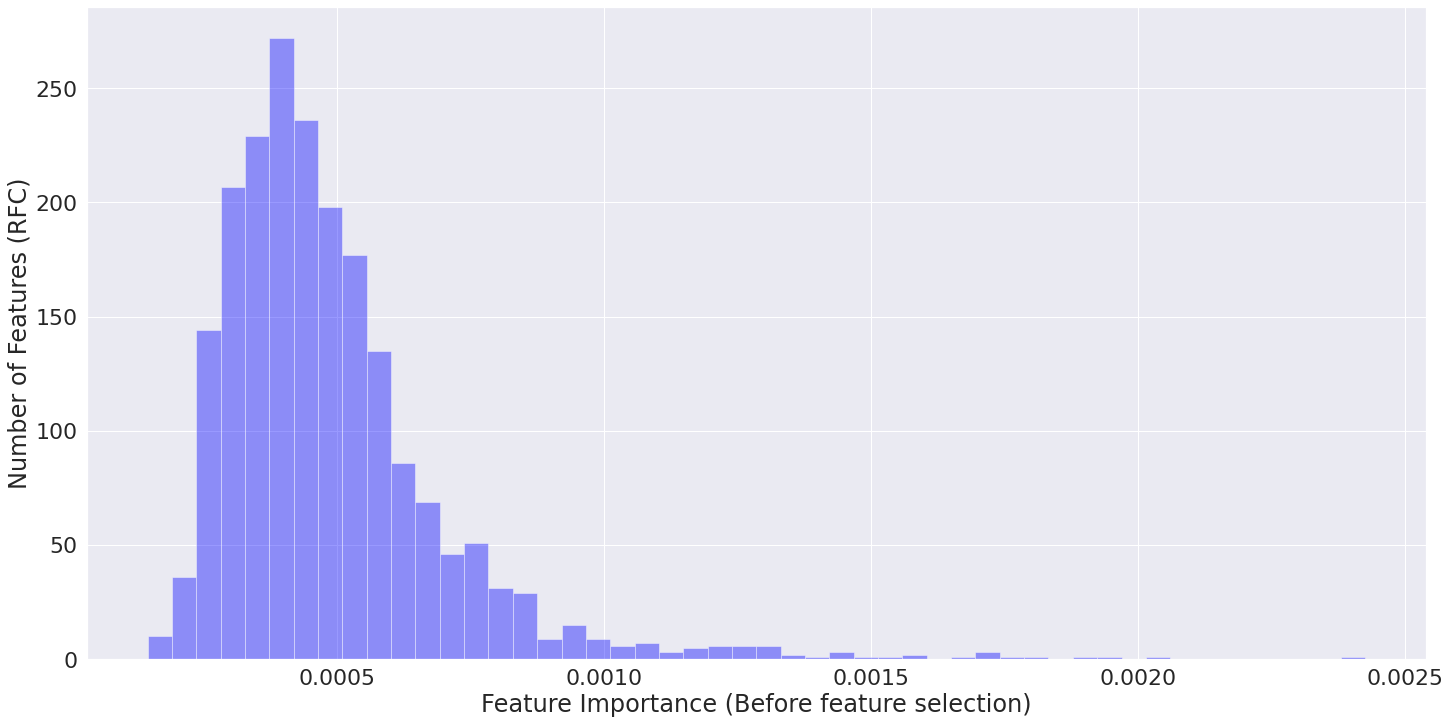

In [46]:
import seaborn as sb
import matplotlib.pyplot as plt
#histogram without feature selection
sb.set(font_scale=2)
f, axes = plt.subplots(1, 1, figsize=(24, 12))
a= sb.distplot(feature_scores, kde = False, color = "blue", axlabel="Feature Importance (Before feature selection)")
axes.set_ylabel("Number of Features (RFC)")

In [47]:
#select these indexes and get those respective features from X
topo_features=feature_scores[0:100]
topo_features

1772    0.002425
1308    0.002020
112     0.001924
2047    0.001914
1339    0.001831
          ...   
1224    0.000869
1026    0.000868
308     0.000865
1657    0.000859
1340    0.000859
Length: 100, dtype: float64

Text(0, 0.5, 'Number of Features (RFC)')

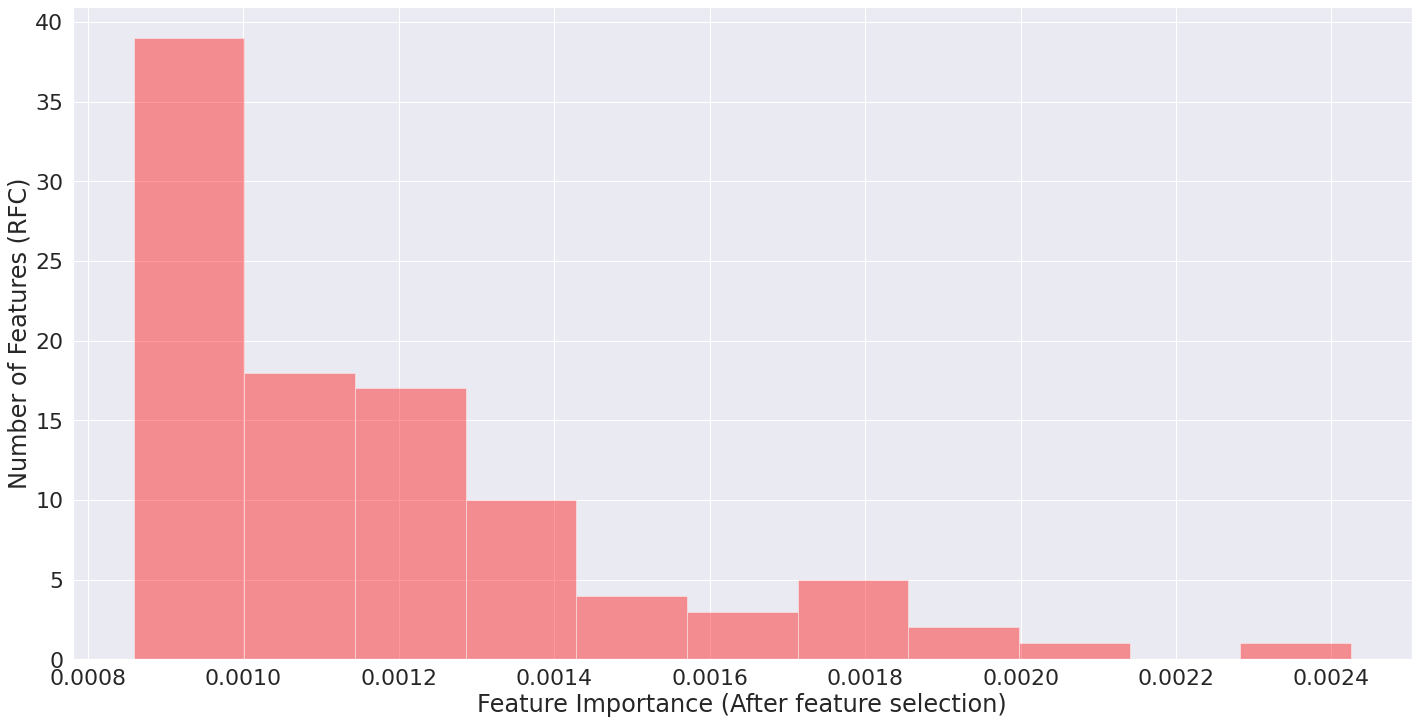

In [48]:
#plotting histogram for features after feature selection
import seaborn as sb
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.distplot(topo_features, kde = False, color = "red",axlabel="Feature Importance (After feature selection)")
axes.set_ylabel("Number of Features (RFC)")

#### After re-training the data

In [49]:
X_feat_train,X_feat_test,y_feat_train,y_feat_test=train_test_split(X[topo_features.index],y,test_size=0.3,random_state=0)
newclassifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
newclassifier.fit(X_feat_train,y_feat_train)
newrfpredict_topo=newclassifier.predict(X_feat_test)
count_misclassified_rf = (y_feat_test != newrfpredict_topo).sum()
newrfaccuracy_topo= 1-(count_misclassified_rf/len(y_feat_test))
newrfaccuracy_topo

SR-HSE           0.951531
NR-AR            0.968821
SR-ARE           0.865646
NR-Aromatase     0.943594
NR-ER-LBD        0.958900
NR-AhR           0.910998
SR-MMP           0.896825
NR-ER            0.909297
NR-PPAR-gamma    0.973073
SR-p53           0.943594
SR-ATAD5         0.974490
NR-AR-LBD        0.972222
dtype: float64

In [50]:
print("\033[1m" + "Random Forest:"+ "\033[0m")
print("\033[1m" + "Before feature selection:"+ "\033[0m")
print(rfaccuracy_topo)
print("------------------")
print("\033[1m" + "After feature selection:"+ "\033[0m")
print(newrfaccuracy_topo)

Random Forest:
Before feature selection:
SR-HSE           0.947279
NR-AR            0.965703
SR-ARE           0.855442
NR-Aromatase     0.941327
NR-ER-LBD        0.960034
NR-AhR           0.908447
SR-MMP           0.892574
NR-ER            0.903628
NR-PPAR-gamma    0.976474
SR-p53           0.939342
SR-ATAD5         0.972506
NR-AR-LBD        0.967687
dtype: float64
------------------
After feature selection:
SR-HSE           0.951531
NR-AR            0.968821
SR-ARE           0.865646
NR-Aromatase     0.943594
NR-ER-LBD        0.958900
NR-AhR           0.910998
SR-MMP           0.896825
NR-ER            0.909297
NR-PPAR-gamma    0.973073
SR-p53           0.943594
SR-ATAD5         0.974490
NR-AR-LBD        0.972222
dtype: float64


In [117]:
sum=0
for x in range(len(rfaccuracy_topo)):
    sum= sum+ rfaccuracy_topo[x]
average= sum/12
print ("Average before Feature Selection: ", average)

Average before Feature Selection:  0.9358701814058955


In [118]:
sum=0
for x in range(len(newrfaccuracy_topo)):
    sum= sum+ newrfaccuracy_topo[x]
average= sum/12
print ("Average after Feature Selection: ", average)

Average after Feature Selection:  0.9390825774754347


### RFE

In [51]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

This will take a really long while

In [52]:
rfe = RFE(lm, n_features_to_select= 100)
rfe = rfe.fit(X, y['SR-HSE'])

Text(0, 0.5, 'Number of Features (RFE)')

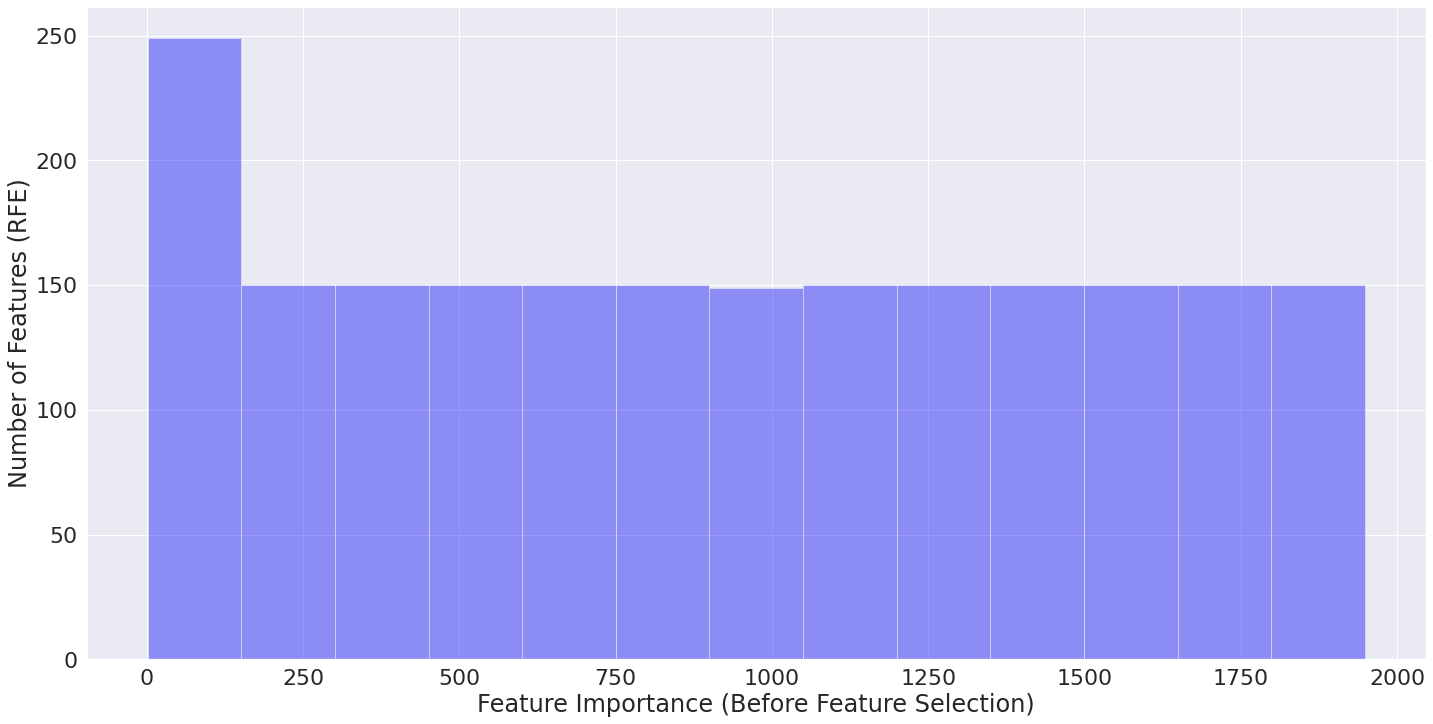

In [53]:
sb.set(font_scale=2)
f, axes = plt.subplots(1, 1, figsize=(24, 12))
a= sb.distplot(rfe.ranking_, kde = False, color = "blue", axlabel="Feature Importance (Before Feature Selection)")
axes.set_ylabel("Number of Features (RFE)")

In [54]:
len(rfe.ranking_)

2048

In [55]:
rfe.ranking_

array([ 558,  218, 1324, ...,    7, 1880,  331])

In [56]:
rfe.ranking_.sum()

1900374

In [57]:
rf_rerank= rfe.ranking_/len(rfe.ranking_)
rf_rerank[1]

0.1064453125

In [58]:
feature_importance= pd.DataFrame(rfe.ranking_,\
                                   index = X.columns,\
                                   columns=['importance']).sort_values('importance', ascending=True)
feature_importance.round(6)

,importance
1598,1
774,1
83,1
161,1
1685,1
...,...
346,1945
213,1946
1928,1947
1707,1948


In [59]:
feat_sel= feature_importance[0:100]
feat_sel

,importance
1598,1
774,1
83,1
161,1
1685,1
...,...
1914,1
1210,1
1633,1
1224,1


If ranking=1, it means that it is the best feature!

In [60]:
X[feat_sel.index]

,1598,774,83,161,1685,1313,1495,1079,1675,357,...,180,1949,1663,718,37,1914,1210,1633,1224,1649
0,0,1,0,1,1,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,1
1,1,0,1,1,1,1,0,1,1,1,...,1,1,1,1,0,1,0,1,1,1
2,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,1,1,1,1,1,0,1,0,...,1,1,1,0,0,1,0,1,0,0
4,0,0,0,1,1,1,1,1,1,0,...,1,0,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11753,1,0,0,1,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,1,0
11754,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,1
11755,1,0,0,1,1,0,1,0,1,0,...,1,0,0,0,0,0,1,0,1,0
11756,0,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0


Text(0, 0.5, 'Number of Features (RFE)')

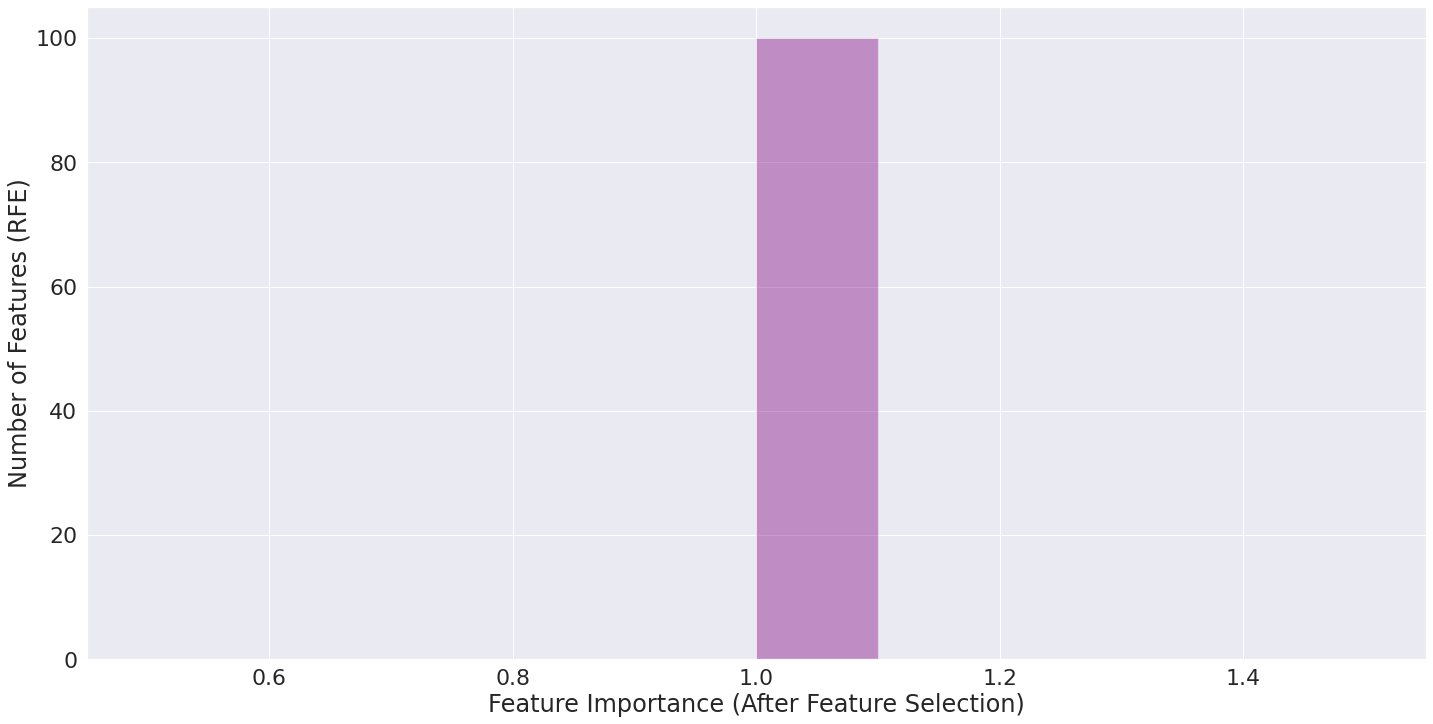

In [61]:
#plotting histogram for features after feature selection
import seaborn as sb

f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.distplot(feat_sel, kde = False, color = "purple",axlabel="Feature Importance (After Feature Selection)")
axes.set_ylabel("Number of Features (RFE)")

In [62]:
Xt_rfe_train,Xt_rfe_test,yt_rfe_train,yt_rfe_test=train_test_split(X[feat_sel.index],y,test_size=0.3,random_state=0)

#### SR-HSE

In [63]:
sr_hse= yt_rfe_train['SR-HSE']
lm.fit(Xt_rfe_train, sr_hse)
newtaccuracy1=lm.score(Xt_rfe_test, yt_rfe_test['SR-HSE'])
print("The accuracy of the model is:",newtaccuracy1)

The accuracy of the model is: 0.9518140589569161


#### NR-AR 

In [64]:
nr_ar= yt_rfe_train['NR-AR']
lm.fit(Xt_rfe_train, nr_ar)
newtaccuracy2= lm.score(Xt_rfe_test, yt_rfe_test['NR-AR'])
print("The accuracy of the model is:",newtaccuracy2)

The accuracy of the model is: 0.9739229024943311


#### SR-ARE

In [65]:
sr_are= yt_rfe_train['SR-ARE']
lm.fit(Xt_rfe_train, sr_are)
newtaccuracy3= lm.score(Xt_rfe_test, yt_rfe_test['SR-ARE'])
print("The accuracy of the model is:",newtaccuracy3)

The accuracy of the model is: 0.8599773242630385


#### NR-Aromatase

In [66]:
nr_aromatase= yt_rfe_train['NR-Aromatase']
lm.fit(Xt_rfe_train, nr_aromatase)
newtaccuracy4= lm.score(Xt_rfe_test, yt_rfe_test['NR-Aromatase'])
print("The accuracy of the model is:",newtaccuracy4)

The accuracy of the model is: 0.9430272108843537


#### NR-ER-LBD

In [67]:
nr_erlbd= yt_rfe_train['NR-ER-LBD']
lm.fit(Xt_rfe_train, nr_erlbd)
newtaccuracy5= lm.score(Xt_rfe_test, yt_rfe_test['NR-ER-LBD'])
print("The accuracy of the model is:",newtaccuracy5)

The accuracy of the model is: 0.9552154195011338


#### NR-AhR

In [68]:
nr_ahr= yt_rfe_train['NR-AhR']
lm.fit(Xt_rfe_train, nr_ahr)
newtaccuracy6= lm.score(Xt_rfe_test, yt_rfe_test['NR-AhR'])
print("The accuracy of the model is:",newtaccuracy6)

The accuracy of the model is: 0.9115646258503401


#### SR-MMP

In [69]:
sr_mmp= yt_rfe_train['SR-MMP']
lm.fit(Xt_rfe_train, sr_mmp)
newtaccuracy7= lm.score(Xt_rfe_test, yt_rfe_test['SR-MMP'])
print("The accuracy of the model is:",newtaccuracy7)

The accuracy of the model is: 0.8883219954648526


#### NR-ER

In [70]:
nr_er= yt_rfe_train['NR-ER']
lm.fit(Xt_rfe_train, nr_er)
newtaccuracy8= lm.score(Xt_rfe_test, yt_rfe_test['NR-ER'])
print("The accuracy of the model is:",newtaccuracy8)

The accuracy of the model is: 0.9081632653061225


#### NR-PPAR-gamma

In [71]:
nr_ppar= yt_rfe_train['NR-PPAR-gamma']
lm.fit(Xt_rfe_train, nr_ppar)
newtaccuracy9= lm.score(Xt_rfe_test, yt_rfe_test['NR-PPAR-gamma'])
print("The accuracy of the model is:",newtaccuracy9)

The accuracy of the model is: 0.9747732426303855


#### SR-p53

In [72]:
sr_p53= yt_rfe_train['SR-p53']
lm.fit(Xt_rfe_train, sr_p53)
newtaccuracy10= lm.score(Xt_rfe_test, yt_rfe_test['SR-p53'])
print("The accuracy of the model is:",newtaccuracy10)

The accuracy of the model is: 0.94359410430839


#### SR-ATAD5

In [73]:
sr_atad5= yt_rfe_train['SR-ATAD5']
lm.fit(Xt_rfe_train, sr_atad5)
newtaccuracy11= lm.score(Xt_rfe_test, yt_rfe_test['SR-ATAD5'])
print("The accuracy of the model is:",newtaccuracy11)

The accuracy of the model is: 0.971655328798186


#### NR-AR-LBD

In [74]:
nr_arlbd= yt_rfe_train['NR-AR-LBD']
lm.fit(Xt_rfe_train, nr_arlbd)
newtaccuracy12= lm.score(Xt_rfe_test, yt_rfe_test['NR-AR-LBD'])
print("The accuracy of the model is:",newtaccuracy12)

The accuracy of the model is: 0.9742063492063492


In [114]:
print("\033[1m" + "Logistic Regression:" + "\033[0m")
print("\033[1m" + "Before Feature Selection:" + "\033[0m")
print("SR-HSE: \t", taccuracy1)
print("NR-AR: \t", taccuracy2)
print("SR-ARE: \t", taccuracy3)
print("NR-Aromatase: \t", taccuracy4)
print("NR-ER-LBD: \t", taccuracy5)
print("NR-AhR: \t", taccuracy6)
print("SR-MMP: \t", taccuracy7)
print("NR-ER: \t", taccuracy8)
print("NR-PPAR-gamma: \t", taccuracy9)
print("SR-p53: \t", taccuracy10)
print("SR-ATAD5: \t", taccuracy11)
print("NR-AR-LBD: \t", taccuracy12)
print("Average: \t", (taccuracy1+taccuracy2+taccuracy3+taccuracy4+taccuracy5+taccuracy6+taccuracy7+taccuracy8+taccuracy9+taccuracy10+taccuracy11+taccuracy12)/12)
print("------------------------------\n")
print("\033[1m" + "After Feature Selection:" + "\033[0m")
print("SR-HSE: \t", newtaccuracy1)
print("NR-AR: \t", newtaccuracy2)
print("SR-ARE: \t", newtaccuracy3)
print("NR-Aromatase: \t", newtaccuracy4)
print("NR-ER-LBD: \t", newtaccuracy5)
print("NR-AhR: \t", newtaccuracy6)
print("SR-MMP: \t", newtaccuracy7)
print("NR-ER: \t", newtaccuracy8)
print("NR-PPAR-gamma: \t", newtaccuracy9)
print("SR-p53: \t", newtaccuracy10)
print("SR-ATAD5: \t", newtaccuracy11)
print("NR-AR-LBD: \t", newtaccuracy12)
print("Average: \t", (newtaccuracy1+newtaccuracy2+newtaccuracy3+newtaccuracy4+newtaccuracy5+newtaccuracy6+newtaccuracy7+newtaccuracy8+newtaccuracy9+newtaccuracy10+newtaccuracy11+newtaccuracy12)/12)

Logistic Regression:
Before Feature Selection:
SR-HSE: 	 0.9430272108843537
NR-AR: 	 0.963718820861678
SR-ARE: 	 0.8378684807256236
NR-Aromatase: 	 0.9319727891156463
NR-ER-LBD: 	 0.9520975056689343
NR-AhR: 	 0.8996598639455783
SR-MMP: 	 0.8818027210884354
NR-ER: 	 0.8883219954648526
NR-PPAR-gamma: 	 0.9759070294784581
SR-p53: 	 0.9280045351473923
SR-ATAD5: 	 0.9708049886621315
NR-AR-LBD: 	 0.9679705215419501
Average: 	 0.9284297052154195
------------------------------

After Feature Selection:
SR-HSE: 	 0.9518140589569161
NR-AR: 	 0.9739229024943311
SR-ARE: 	 0.8599773242630385
NR-Aromatase: 	 0.9430272108843537
NR-ER-LBD: 	 0.9552154195011338
NR-AhR: 	 0.9115646258503401
SR-MMP: 	 0.8883219954648526
NR-ER: 	 0.9081632653061225
NR-PPAR-gamma: 	 0.9747732426303855
SR-p53: 	 0.94359410430839
SR-ATAD5: 	 0.971655328798186
NR-AR-LBD: 	 0.9742063492063492
Average: 	 0.9380196523053667


### Re-training SVM SVC

Was not able to use my sig model to re-train the features as some error popped up. Error mentioned that the model didn't have a coeff_, but it does

#### SR-HSE

In [76]:
sr_hse= yt_rfe_train['SR-HSE']
sig.fit(Xt_rfe_train, sr_hse)
newtsaccuracy1=sig.score(Xt_rfe_test, yt_rfe_test['SR-HSE'])
print("The accuracy of the model is:",newtsaccuracy1)

The accuracy of the model is: 0.9257369614512472


#### NR-AR 

In [77]:
nr_ar= yt_rfe_train['NR-AR']
sig.fit(Xt_rfe_train, nr_ar)
newtsaccuracy2= sig.score(Xt_rfe_test, yt_rfe_test['NR-AR'])
print("The accuracy of the model is:",newtsaccuracy2)

The accuracy of the model is: 0.9554988662131519


#### SR-ARE

In [78]:
sr_are= yt_rfe_train['SR-ARE']
sig.fit(Xt_rfe_train, sr_are)
newtsaccuracy3= sig.score(Xt_rfe_test, yt_rfe_test['SR-ARE'])
print("The accuracy of the model is:",newtsaccuracy3)

The accuracy of the model is: 0.796201814058957


#### NR-Aromatase

In [79]:
nr_aromatase= yt_rfe_train['NR-Aromatase']
sig.fit(Xt_rfe_train, nr_aromatase)
newtsaccuracy4= sig.score(Xt_rfe_test, yt_rfe_test['NR-Aromatase'])
print("The accuracy of the model is:",newtsaccuracy4)

The accuracy of the model is: 0.9285714285714286


#### NR-ER-LBD

In [80]:
nr_erlbd= yt_rfe_train['NR-ER-LBD']
sig.fit(Xt_rfe_train, nr_erlbd)
newtsaccuracy5= sig.score(Xt_rfe_test, yt_rfe_test['NR-ER-LBD'])
print("The accuracy of the model is:",newtsaccuracy5)

The accuracy of the model is: 0.9438775510204082


#### NR-AhR

In [81]:
nr_ahr= yt_rfe_train['NR-AhR']
sig.fit(Xt_rfe_train, nr_ahr)
newtsaccuracy6= sig.score(Xt_rfe_test, yt_rfe_test['NR-AhR'])
print("The accuracy of the model is:",newtsaccuracy6)

The accuracy of the model is: 0.8857709750566893


#### SR-MMP

In [82]:
sr_mmp= yt_rfe_train['SR-MMP']
sig.fit(Xt_rfe_train, sr_mmp)
newtsaccuracy7= sig.score(Xt_rfe_test, yt_rfe_test['SR-MMP'])
print("The accuracy of the model is:",newtsaccuracy7)

The accuracy of the model is: 0.8412698412698413


#### NR-ER

In [83]:
nr_er= yt_rfe_train['NR-ER']
sig.fit(Xt_rfe_train, nr_er)
newtsaccuracy8= sig.score(Xt_rfe_test, yt_rfe_test['NR-ER'])
print("The accuracy of the model is:",newtsaccuracy8)

The accuracy of the model is: 0.8784013605442177


#### NR-PPAR-gamma

In [84]:
nr_ppar= yt_rfe_train['NR-PPAR-gamma']
sig.fit(Xt_rfe_train, nr_ppar)
newtsaccuracy9= sig.score(Xt_rfe_test, yt_rfe_test['NR-PPAR-gamma'])
print("The accuracy of the model is:",newtsaccuracy9)

The accuracy of the model is: 0.9682539682539683


#### SR-p53

In [85]:
sr_p53= yt_rfe_train['SR-p53']
sig.fit(Xt_rfe_train, sr_p53)
newtsaccuracy10= sig.score(Xt_rfe_test, yt_rfe_test['SR-p53'])
print("The accuracy of the model is:",newtsaccuracy10)

The accuracy of the model is: 0.9297052154195011


#### SR-ATAD5

In [86]:
sr_atad5= yt_rfe_train['SR-ATAD5']
sig.fit(Xt_rfe_train, sr_atad5)
newtsaccuracy11= sig.score(Xt_rfe_test, yt_rfe_test['SR-ATAD5'])
print("The accuracy of the model is:",newtsaccuracy11)

The accuracy of the model is: 0.9662698412698413


#### NR-AR-LBD

In [87]:
nr_arlbd= yt_rfe_train['NR-AR-LBD']
sig.fit(Xt_rfe_train, nr_arlbd)
newtsaccuracy12= sig.score(Xt_rfe_test, yt_rfe_test['NR-AR-LBD'])
print("The accuracy of the model is:",newtsaccuracy12)

The accuracy of the model is: 0.9580498866213152


In [115]:
print("\033[1m" + "SVM SC Regression:" + "\033[0m")
print("\033[1m" + "Before Feature Selection:" + "\033[0m")
print("SR-HSE: \t", tsaccuracy1)
print("NR-AR: \t", tsaccuracy2)
print("SR-ARE: \t", tsaccuracy3)
print("NR-Aromatase: \t", tsaccuracy4)
print("NR-ER-LBD: \t", tsaccuracy5)
print("NR-AhR: \t", tsaccuracy6)
print("SR-MMP: \t", tsaccuracy7)
print("NR-ER: \t", tsaccuracy8)
print("NR-PPAR-gamma: \t", tsaccuracy9)
print("SR-p53: \t", tsaccuracy10)
print("SR-ATAD5: \t", tsaccuracy11)
print("NR-AR-LBD: \t", tsaccuracy12)
print("Average: \t", (tsaccuracy1+tsaccuracy2+tsaccuracy3+tsaccuracy4+tsaccuracy5+tsaccuracy6+tsaccuracy7+tsaccuracy8+tsaccuracy9+tsaccuracy10+tsaccuracy11+tsaccuracy12)/12)

print("------------------------------\n")
print("\033[1m" + "After Feature Selection:" + "\033[0m")
print("SR-HSE: \t", newtsaccuracy1)
print("NR-AR: \t", newtsaccuracy2)
print("SR-ARE: \t", newtsaccuracy3)
print("NR-Aromatase: \t", newtsaccuracy4)
print("NR-ER-LBD: \t", newtsaccuracy5)
print("NR-AhR: \t", newtsaccuracy6)
print("SR-MMP: \t", newtsaccuracy7)
print("NR-ER: \t", newtsaccuracy8)
print("NR-PPAR-gamma: \t", newtsaccuracy9)
print("SR-p53: \t", newtsaccuracy10)
print("SR-ATAD5: \t", newtsaccuracy11)
print("NR-AR-LBD: \t", newtsaccuracy12)
print("Average: \t", (newtsaccuracy1+newtsaccuracy2+newtsaccuracy3+newtsaccuracy4+newtsaccuracy5+newtsaccuracy6+newtsaccuracy7+newtsaccuracy8+newtsaccuracy9+newtsaccuracy10+newtsaccuracy11+newtsaccuracy12)/12)


SVM SC Regression:
Before Feature Selection:
SR-HSE: 	 0.941609977324263
NR-AR: 	 0.9654195011337868
SR-ARE: 	 0.7967687074829932
NR-Aromatase: 	 0.9322562358276644
NR-ER-LBD: 	 0.9509637188208617
NR-AhR: 	 0.8897392290249433
SR-MMP: 	 0.8458049886621315
NR-ER: 	 0.8962585034013606
NR-PPAR-gamma: 	 0.9764739229024944
SR-p53: 	 0.9265873015873016
SR-ATAD5: 	 0.9674036281179138
NR-AR-LBD: 	 0.9648526077097506
Average: 	 0.9211781934996223
------------------------------

After Feature Selection:
SR-HSE: 	 0.9257369614512472
NR-AR: 	 0.9554988662131519
SR-ARE: 	 0.796201814058957
NR-Aromatase: 	 0.9285714285714286
NR-ER-LBD: 	 0.9438775510204082
NR-AhR: 	 0.8857709750566893
SR-MMP: 	 0.8412698412698413
NR-ER: 	 0.8784013605442177
NR-PPAR-gamma: 	 0.9682539682539683
SR-p53: 	 0.9297052154195011
SR-ATAD5: 	 0.9662698412698413
NR-AR-LBD: 	 0.9580498866213152
Average: 	 0.914800642479214


### Re-training Neural Network Model

Using features from **RFC**

In [97]:
newmodel = keras.Sequential(
    [
        layers.Embedding(8230,128,name="embedding_layer", input_length= 100),
        layers.Dense(1300, activation="relu"),
        #layers.Dense(3, activation="relu"),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(12,activation='sigmoid', name="Output_layer"),
    ]
)

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


In [98]:
newmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 100, 128)          1053440   
_________________________________________________________________
dense_1 (Dense)              (None, 100, 1300)         167700    
_________________________________________________________________
flatten_1 (Flatten)          (None, 130000)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 130000)            0         
_________________________________________________________________
Output_layer (Dense)         (None, 12)                1560012   
Total params: 2,781,152
Trainable params: 2,781,152
Non-trainable params: 0
_________________________________________________________________


In [99]:
#compile and fit the model
newmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [101]:
newmodel.fit(X_feat_train, y_feat_train, epochs=10, batch_size=48, verbose=0.1)

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [102]:
#using model.predict to do thresholding
newpred = newmodel.predict(X_feat_train)
newpred= tf.dtypes.cast(newpred>= 0.5, tf.int64)

#for training data
count=0
for i in range(len(y_feat_train)):
    a= (y_feat_train.iloc[i]==newpred[i])
    for j in range(len(a)):
        if (y_feat_train.iloc[i][j]==newpred[i][j]):
            count= count+1
print("The accuracy for the training set is: ",(count)/(len(y_feat_train)*12))

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_predict_function_2491861 in device /job:localhost/replica:0/task:0/

In [105]:
#for test set
newpredtest= newmodel.predict(X_feat_test)
newpredtest= tf.dtypes.cast(newpredtest>= 0.5, tf.int64)
count=0
for i in range(len(y_feat_test)):
    a= (y_feat_test.iloc[i]==newpredtest[i])
    for j in range(len(a)):
        if (y_feat_test.iloc[i][j]==newpredtest[i][j]):
            count= count+1
print("The accuracy for test score is: ", count/(len(y_feat_test)*12))

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
The accuracy for test score is:  0.9374527588813303


In [106]:
loss, acc= newmodel.evaluate(X_feat_test, y_feat_test, batch_size=128)
loss

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_3950634 in device /job:localhost/replica:0/task:0/device:GPU:0
28/28 [==============================] - 0s 6ms/step - loss: 0.1955 - accuracy

0.19548901915550232

Using features from **RFE**

In [107]:
newmodel.fit(Xt_rfe_train, yt_rfe_train, epochs=10, batch_size=48, verbose=0.1)

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [108]:
#using model.predict to do thresholding
newpred = newmodel.predict(Xt_rfe_train)
newpred= tf.dtypes.cast(newpred>= 0.5, tf.int64)

#for training data
count=0
for i in range(len(yt_rfe_train)):
    a= (yt_rfe_train.iloc[i]==newpred[i])
    for j in range(len(a)):
        if (yt_rfe_train.iloc[i][j]==newpred[i][j]):
            count= count+1
print("The accuracy for the training set is: ",(count)/(len(yt_rfe_train)*12))

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
The accuracy for the training set is:  0.9369582827055488


In [109]:
#for test set
newpredtest= newmodel.predict(Xt_rfe_test)
newpredtest= tf.dtypes.cast(newpredtest>= 0.5, tf.int64)
count=0
for i in range(len(yt_rfe_test)):
    a= (yt_rfe_test.iloc[i]==newpredtest[i])
    for j in range(len(a)):
        if (yt_rfe_test.iloc[i][j]==newpredtest[i][j]):
            count= count+1
print("The accuracy for test score is: ", count/(len(yt_rfe_test)*12))

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
The accuracy for test score is:  0.9375


In [110]:
loss, acc= newmodel.evaluate(Xt_rfe_test, yt_rfe_test, batch_size=128)
loss

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
28/28 [==============================] - 0s 6ms/step - loss: 0.1922 - accuracy: 0.1001


0.1922113299369812

---